In [1]:
from array import array
import math
import numpy as np
import random

from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Simple Linear Fitting Example', 200, 10, 1400, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

gr = []

Welcome to JupyROOT 6.16/00


In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x

In [3]:
m = 1 #Set the order of the polynomial
n = 15 #Set the number of data points
#growing errors
#sigma = array('d')
#sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
#constraining endpoints
#sigma = array('d')
#sigma = [.7,6,5,4,3,2,1,.5,1,2,3,4,5,6,.7]
#determining zero crossing
#sigma = array('d')
#sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
#positive values - slope
#sigma = array('d')
#sigma = [1,1,2,2,3,3,4,4,5,5,6,6,7,7,8]
#positive values - intercept
sigma = array('d')
sigma = [8,7,7,6,6,5,5,4,4,3,3,2,2,1,1]

In [4]:
par = array('d')
par.append(1.80)
par.append(4.05)

random.seed(1)

for igr in range(0,1000):
    print(igr)
    x = array('d')
    y = array('d')
    jitter = array('d')
    for i in range(0,n):
        #x.append(-4.0+8.0*i/n)
        x.append(0.0+8.0*i/n)
        jitter_estimate = random.gauss(0.0,sigma[i]/3.0)
        #print(jitter_estimate)
        jitter.append(jitter_estimate)
        y.append(generator_function(x[i],par)+jitter[i])
        
    m_params = m + 1
    a = np.zeros(shape = (m_params,m_params))
    v = np.zeros(shape = (m_params,1))
    
    for k in range(0,m_params):
        for i in range(0,n):
            v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)
        #print ("v[%d] = %f" % (k,v[k][0]))
        for j in range(0,m_params):
            for i in range(0,n):
                a[k][j]=a[k][j]+math.pow(x[i],k+j)
            #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
    #print ("A matrix = ")        
    #print (a)
    #print("V matrix = ")
    #print (v)

    ainv = np.linalg.inv(a)
    u1 = np.dot(a,ainv)

    #print ("A_inverse = ")
    #print (ainv)
    #print ("Diagonal Check:")
    #print (u1)
    coeff = ainv*np.matrix(v)
    #print ("Coefficients:")
    #print (coeff)
    
    yfit = 0.0
    chi2 = 0.0
    for i in range(0,n):
        for j in range(0,m+1):
            yfit = yfit + coeff[j]*math.pow(x[i],j)
        #print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
        chi2 = chi2 + math.pow((yfit-y[i]),2)
        yfit = 0
    
    chi2perdof = chi2/(n-m-1)
    #print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))
    
    for k in range(0,m+1):
        print("k = %d, err = %f" % (k,math.pow(ainv[k][k]*chi2perdof,0.5)))
        
    gr.append(TGraph(n,x,y))
    #print (igr)

    pfit1 = TF1("pfit1","pol1")
    gr[igr].SetMarkerStyle(21)
    gr[igr].SetTitle("Linear Fit")
    gr[igr].GetXaxis().SetTitle("X")
    gr[igr].GetYaxis().SetTitle("Y")
    gr[igr].GetHistogram().SetMaximum(37.0)
    gr[igr].GetHistogram().SetMinimum(-10.0)

    gr[igr].Fit("pfit1","q")
    pfit1chi2 = pfit1.GetChisquare()
    pfit1ndf = pfit1.GetNDF()
    pfit1chi2ndf = pfit1chi2/pfit1ndf
    #print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
    if (igr == 0):
        gr[igr].Draw("AP")
    else:
        gr[igr].Draw("P")

0
k = 0, err = 0.790705
k = 1, err = 0.180230
1
k = 0, err = 0.670647
k = 1, err = 0.152865
2
k = 0, err = 0.484681
k = 1, err = 0.110476
3
k = 0, err = 0.901516
k = 1, err = 0.205488
4
k = 0, err = 0.785313
k = 1, err = 0.179001
5
k = 0, err = 0.816173
k = 1, err = 0.186036
6
k = 0, err = 0.766458
k = 1, err = 0.174704
7
k = 0, err = 0.586098
k = 1, err = 0.133593
8
k = 0, err = 0.645847
k = 1, err = 0.147212
9
k = 0, err = 0.656794
k = 1, err = 0.149707
10
k = 0, err = 0.633428
k = 1, err = 0.144381
11
k = 0, err = 0.767941
k = 1, err = 0.175042
12
k = 0, err = 0.935529
k = 1, err = 0.213241
13
k = 0, err = 0.622699
k = 1, err = 0.141936
14
k = 0, err = 0.975166
k = 1, err = 0.222276
15
k = 0, err = 0.760019
k = 1, err = 0.173236
16
k = 0, err = 0.772314
k = 1, err = 0.176039
17
k = 0, err = 0.688400
k = 1, err = 0.156912
18
k = 0, err = 1.034054
k = 1, err = 0.235699
19
k = 0, err = 0.833543
k = 1, err = 0.189995
20
k = 0, err = 0.552232
k = 1, err = 0.125874
21
k = 0, err = 0.55697

k = 0, err = 0.842013
k = 1, err = 0.191926
240
k = 0, err = 0.791946
k = 1, err = 0.180513
241
k = 0, err = 0.761793
k = 1, err = 0.173640
242
k = 0, err = 0.544556
k = 1, err = 0.124124
243
k = 0, err = 0.719289
k = 1, err = 0.163952
244
k = 0, err = 1.010055
k = 1, err = 0.230228
245
k = 0, err = 0.834471
k = 1, err = 0.190206
246
k = 0, err = 1.229888
k = 1, err = 0.280336
247
k = 0, err = 0.801880
k = 1, err = 0.182778
248
k = 0, err = 0.406089
k = 1, err = 0.092563
249
k = 0, err = 0.770997
k = 1, err = 0.175738
250
k = 0, err = 0.761969
k = 1, err = 0.173681
251
k = 0, err = 0.661435
k = 1, err = 0.150765
252
k = 0, err = 0.881321
k = 1, err = 0.200885
253
k = 0, err = 0.936340
k = 1, err = 0.213426
254
k = 0, err = 0.617347
k = 1, err = 0.140716
255
k = 0, err = 0.609946
k = 1, err = 0.139029
256
k = 0, err = 0.870645
k = 1, err = 0.198452
257
k = 0, err = 0.759747
k = 1, err = 0.173174
258
k = 0, err = 0.691715
k = 1, err = 0.157667
259
k = 0, err = 0.439999
k = 1, err = 0.100

482
k = 0, err = 0.672249
k = 1, err = 0.153230
483
k = 0, err = 0.683518
k = 1, err = 0.155799
484
k = 0, err = 0.589413
k = 1, err = 0.134349
485
k = 0, err = 0.832045
k = 1, err = 0.189653
486
k = 0, err = 0.831281
k = 1, err = 0.189479
487
k = 0, err = 0.640814
k = 1, err = 0.146065
488
k = 0, err = 1.025262
k = 1, err = 0.233695
489
k = 0, err = 0.592611
k = 1, err = 0.135078
490
k = 0, err = 0.896134
k = 1, err = 0.204262
491
k = 0, err = 0.636849
k = 1, err = 0.145161
492
k = 0, err = 0.530806
k = 1, err = 0.120990
493
k = 0, err = 0.622319
k = 1, err = 0.141849
494
k = 0, err = 0.611948
k = 1, err = 0.139485
495
k = 0, err = 0.867835
k = 1, err = 0.197811
496
k = 0, err = 0.937537
k = 1, err = 0.213699
497
k = 0, err = 0.726423
k = 1, err = 0.165578
498
k = 0, err = 0.942532
k = 1, err = 0.214837
499
k = 0, err = 0.736486
k = 1, err = 0.167872
500
k = 0, err = 1.009447
k = 1, err = 0.230090
501
k = 0, err = 0.821368
k = 1, err = 0.187220
502
k = 0, err = 0.717942
k = 1, err = 0

k = 0, err = 0.745863
k = 1, err = 0.170009
751
k = 0, err = 0.894314
k = 1, err = 0.203847
752
k = 0, err = 0.704866
k = 1, err = 0.160665
753
k = 0, err = 0.940807
k = 1, err = 0.214444
754
k = 0, err = 0.493383
k = 1, err = 0.112460
755
k = 0, err = 0.658150
k = 1, err = 0.150016
756
k = 0, err = 0.515733
k = 1, err = 0.117554
757
k = 0, err = 0.784616
k = 1, err = 0.178843
758
k = 0, err = 0.635608
k = 1, err = 0.144878
759
k = 0, err = 0.640250
k = 1, err = 0.145936
760
k = 0, err = 0.959897
k = 1, err = 0.218796
761
k = 0, err = 0.582124
k = 1, err = 0.132687
762
k = 0, err = 0.721452
k = 1, err = 0.164445
763
k = 0, err = 0.908589
k = 1, err = 0.207101
764
k = 0, err = 0.713893
k = 1, err = 0.162722
765
k = 0, err = 0.914993
k = 1, err = 0.208560
766
k = 0, err = 0.995271
k = 1, err = 0.226859
767
k = 0, err = 0.669960
k = 1, err = 0.152708
768
k = 0, err = 0.821826
k = 1, err = 0.187324
769
k = 0, err = 0.630156
k = 1, err = 0.143635
770
k = 0, err = 0.624734
k = 1, err = 0.142

928
k = 0, err = 0.836465
k = 1, err = 0.190661
929
k = 0, err = 0.723174
k = 1, err = 0.164838
930
k = 0, err = 0.573657
k = 1, err = 0.130757
931
k = 0, err = 0.481570
k = 1, err = 0.109767
932
k = 0, err = 0.844031
k = 1, err = 0.192386
933
k = 0, err = 0.615901
k = 1, err = 0.140386
934
k = 0, err = 0.754958
k = 1, err = 0.172083
935
k = 0, err = 0.712047
k = 1, err = 0.162302
936
k = 0, err = 1.069417
k = 1, err = 0.243759
937
k = 0, err = 0.708469
k = 1, err = 0.161486
938
k = 0, err = 0.673006
k = 1, err = 0.153403
939
k = 0, err = 0.523525
k = 1, err = 0.119330
940
k = 0, err = 0.722522
k = 1, err = 0.164689
941
k = 0, err = 1.387828
k = 1, err = 0.316337
942
k = 0, err = 0.833084
k = 1, err = 0.189890
943
k = 0, err = 0.649460
k = 1, err = 0.148036
944
k = 0, err = 0.583519
k = 1, err = 0.133005
945
k = 0, err = 0.852571
k = 1, err = 0.194332
946
k = 0, err = 0.833202
k = 1, err = 0.189917
947
k = 0, err = 0.652328
k = 1, err = 0.148689
948
k = 0, err = 0.880646
k = 1, err = 0

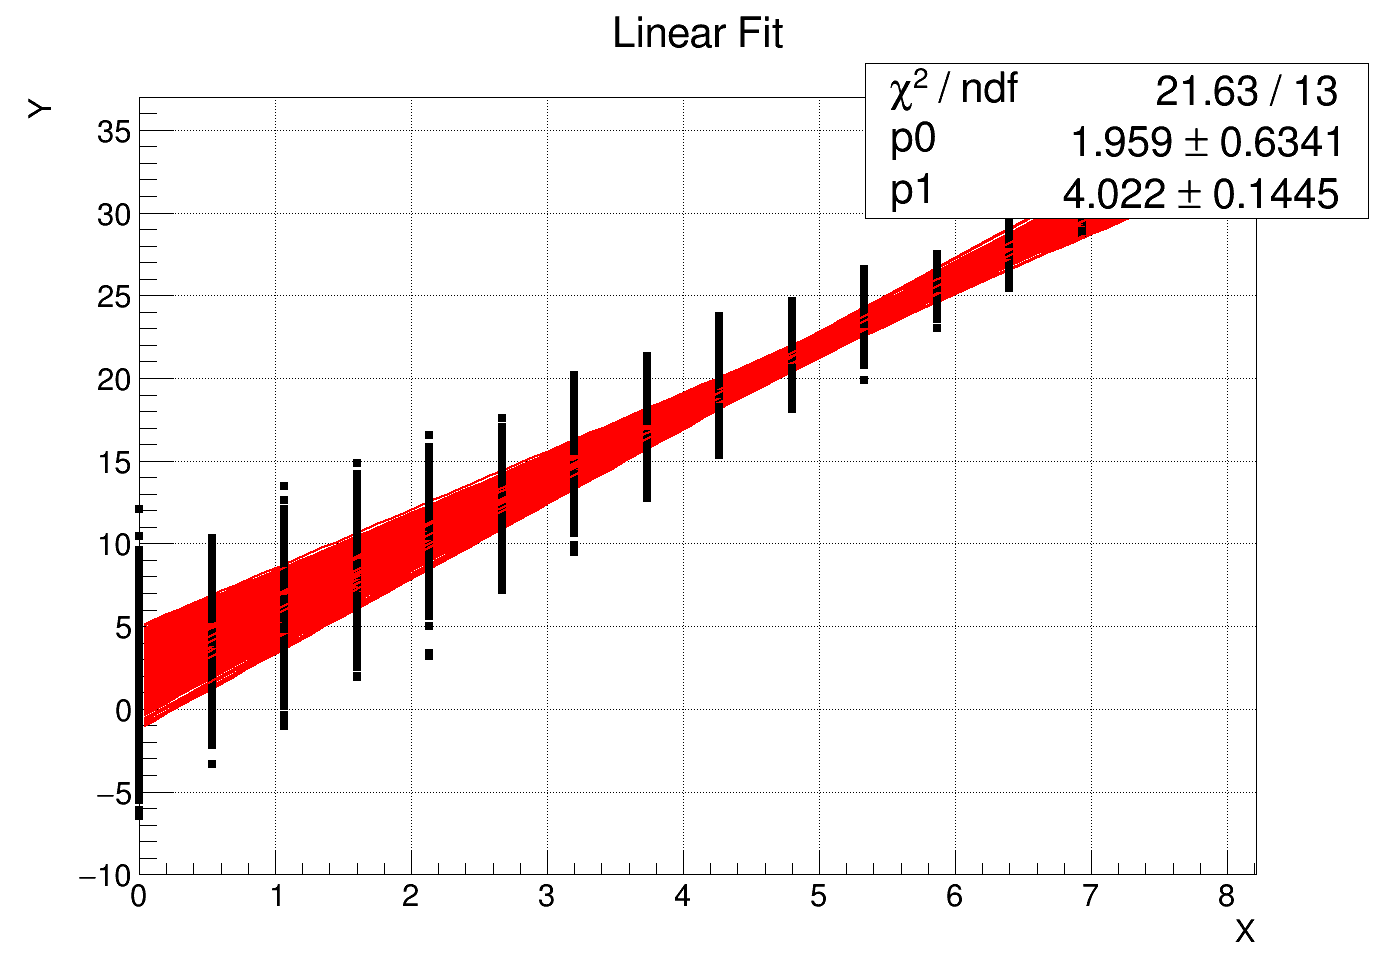

In [5]:
c1.Draw()